In [1]:
!git clone https://github.com/eaguaida/RISE-SFL.git

Cloning into 'RISE-SFL'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 222 (delta 110), reused 166 (delta 56), pack-reused 0
Receiving objects: 100% (222/222), 2.76 MiB | 6.11 MiB/s, done.
Resolving deltas: 100% (110/110), done.


In [2]:
import sys
import os

rise_sfl_path = "/content/RISE-SFL/RISE-SFL"  # Replace with the actual path to your RISE-SFL folder
sys.path.append(rise_sfl_path)

In [3]:
from utils.utils import *
from masker.generation import SFL

In [4]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision.datasets as datasets
import torchvision.models as models
from torchvision import transforms
from PIL import Image
from keras.preprocessing import image
import json
from torch.nn.functional import softmax, conv2d

In [ ]:
cudnn.benchmark = True
model = models.resnet50(True)
model = nn.Sequential(model, nn.Softmax(dim=1))
model = model.eval()
model = model.cuda()

for p in model.parameters():
    p.requires_grad = False

model = nn.DataParallel(model)

In [6]:
import os
import requests
import zipfile
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import numpy as np

In [8]:
img_path = '/content/RISE-SFL/data_demo/catdog.png'
N = 500
s = 8
p1 = 0.2
explainer = SFL(model, (224, 224))
masks, sampled_tensor = explainer.generate_mutants_batch(img_path,N,s,p1,target_class=243,batch_size=50)


  0%|░░░░░░░░░░| 0/10 [00:00<?, ?it/s]/content/RISE-SFL/RISE-SFL/masker/generation.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cell_size = torch.ceil(torch.tensor(self.input_size).float() / s)
100%|██████████| 10/10 [04:27<00:00, 26.76s/it]


In [9]:
def generate_pass_fail_list(N):
    return ["Pass" if i % 2 == 0 else "Fail" for i in range(N)]

pass_fail_list = generate_pass_fail_list(N)

from visuals.plots import SFLVisualizer

In [10]:
visualizer = SFLVisualizer()
visualizer.interactive_mutant_visualization(sampled_tensor, pass_fail_list)

interactive(children=(IntSlider(value=0, description='Mutant Index:', max=499), Output()), _dom_classes=('widg…

In [11]:
from sfl_techniques.sfl import RelevanceScore

relevance_score_calculator = RelevanceScore(device='cuda')
pixel_dataset = relevance_score_calculator.run(sampled_tensor, masks, N)

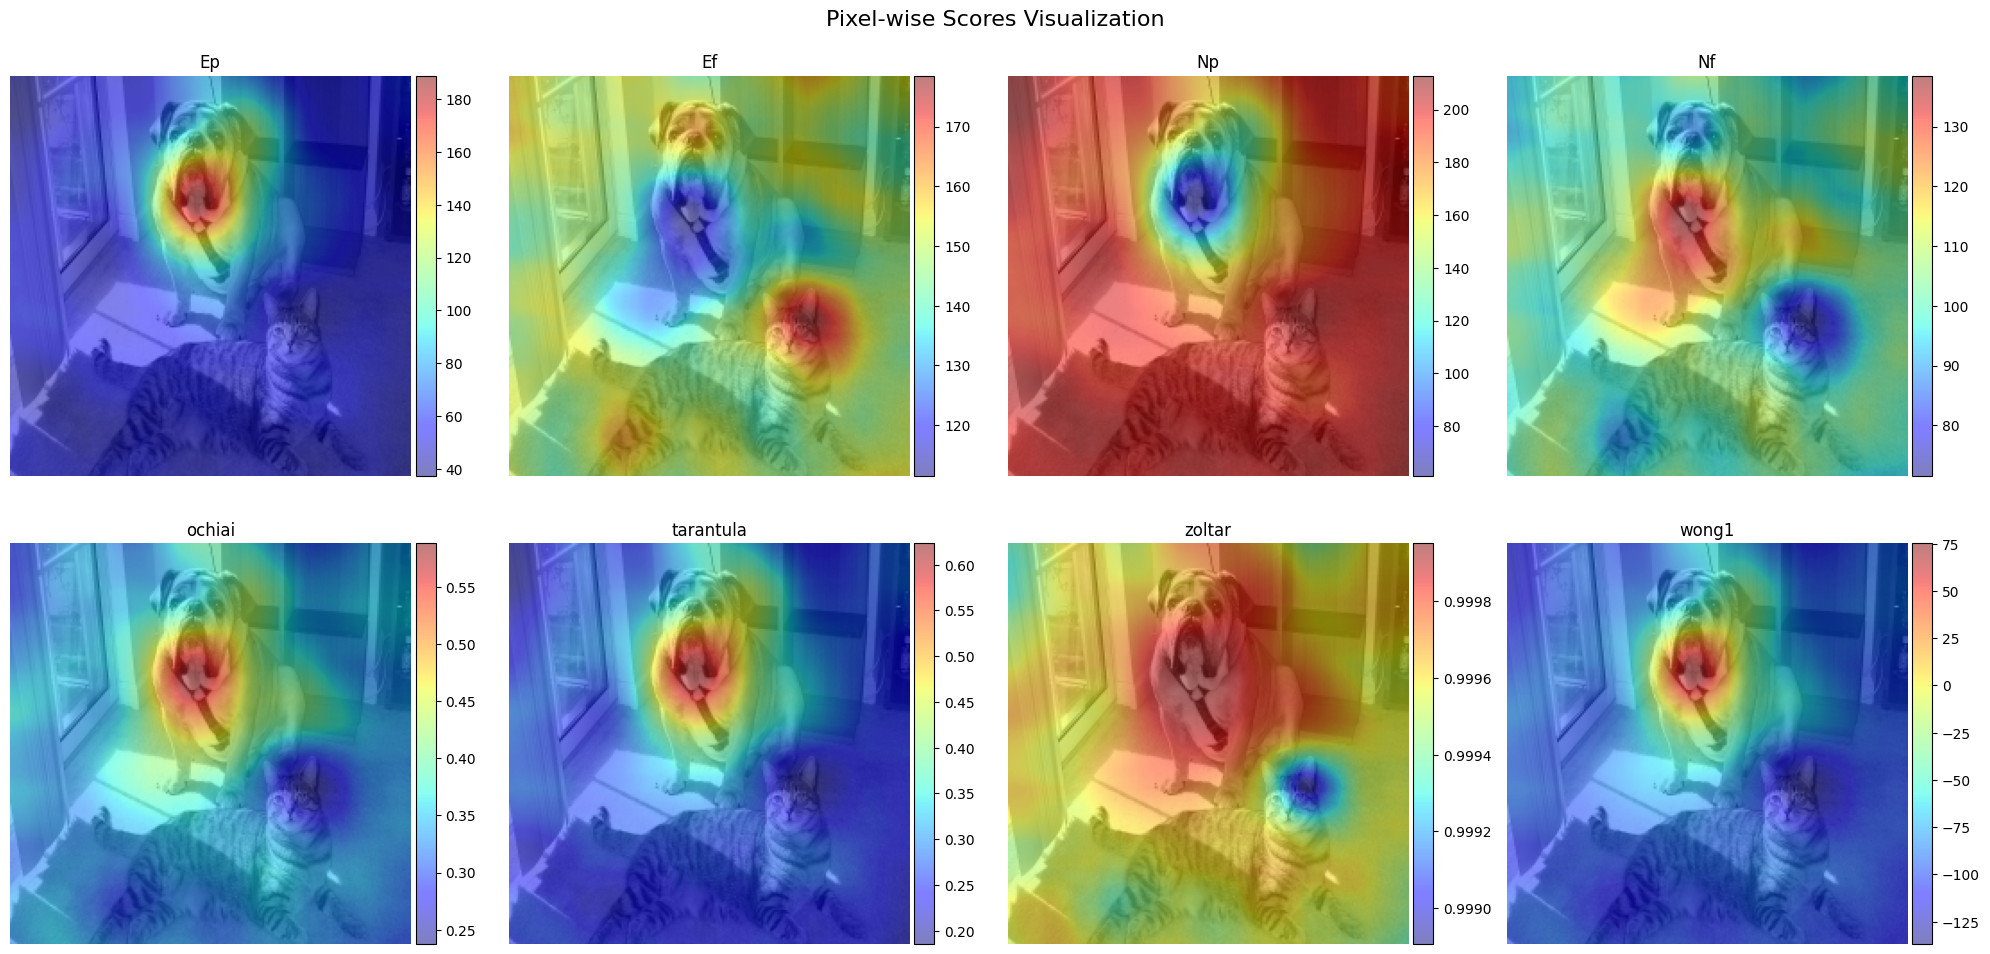

In [12]:
from visuals.saliency_maps.saliency import SaliencyMapVisualizer

saliency_map = SaliencyMapVisualizer('/content/RISE-SFL/data_demo/catdog.png')
saliency_map.visualize_pixel_scores(pixel_dataset)